In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from geopy.geocoders import Nominatim

In [2]:
import os
from os.path import expanduser
home = expanduser("~")
os.chdir(os.path.join(home, 'Documents', 'Trainings', 'inpost'))
print('Current working directory set to:')
os.getcwd()

Current working directory set to:


'/Users/joannawojdylo/Documents/Trainings/inpost'

In [3]:
RAW_DIR = os.path.join(os.getcwd(), 'data', 'raw')

In [4]:
clients = pd.read_csv(os.path.join(RAW_DIR, 'klienci.csv'), index_col = 0)
session_info = pd.read_csv(os.path.join(RAW_DIR, 'session_info.csv'))
session_geo = pd.read_csv(os.path.join(RAW_DIR, 'session_geo.csv'))

In [5]:
clients.head()

,klient_id,wyksztalcenie,czy_samochod,czy_mieszkanie,plec,wynagrodzenie,wiek,czy_kupil,czy_w_bazie_klientow,liczba_zakupionych_wczesniej_produktow
0,0,podstawowe,0,1.0,0,8643.0,61.0,0,0,3.0
1,1,srednie,0,0.0,0,5537.0,44.0,0,1,11.0
2,2,podstawowe,1,1.0,0,8985.0,50.0,0,1,39.0
3,3,srednie,1,0.0,0,5547.0,57.0,0,1,8.0
4,4,wyzsze,0,0.0,1,9211.0,54.0,0,1,7.0


In [6]:
clients.describe()

,klient_id,czy_samochod,czy_mieszkanie,plec,wynagrodzenie,wiek,czy_kupil,czy_w_bazie_klientow,liczba_zakupionych_wczesniej_produktow
count,6000.000000,6000.000000,5910.000000,6000.000000,5880.000000,5820.000000,6000.000000,6000.000000,5520.000000
mean,2999.500000,0.644000,0.520474,0.353333,8189.846088,50.873196,0.178000,0.794333,8.861413
std,1732.195139,0.478855,0.499623,0.478045,2069.266849,6.819833,0.382545,0.404222,5.619527
min,0.000000,0.000000,0.000000,0.000000,2100.000000,18.000000,0.000000,0.000000,0.000000
25%,1499.750000,0.000000,0.000000,0.000000,6677.500000,47.000000,0.000000,1.000000,6.000000
50%,2999.500000,1.000000,1.000000,0.000000,7793.000000,51.000000,0.000000,1.000000,9.000000
75%,4499.250000,1.000000,1.000000,1.000000,9546.500000,55.000000,0.000000,1.000000,11.000000
max,5999.000000,1.000000,1.000000,1.000000,16100.000000,73.000000,1.000000,1.000000,39.000000


In [7]:
session_info.head()

,id_sesji,klient_id,date,dlugosc_sesji_min
0,972387,0,2020-05-01 18:07:54,3.302053
1,384994,0,2020-04-14 13:31:19,0.274498
2,173981,0,2020-08-04 17:36:17,2.846373
3,144649,0,2020-04-14 09:54:36,1.009348
4,475443,0,2020-04-24 21:51:14,4.217949


In [8]:
session_geo.head()

,id_sesji,lon,lat
0,972387,20.408246,52.094380
1,384994,20.408145,52.018082
2,173981,20.432250,52.038129
3,144649,20.422656,52.076472
4,475443,20.363652,52.118518


### Ilu firma ma obecnie klientów i jaki procent z nich korzysta z usługi premium?

In [9]:
number_of_clients = clients.shape[0]
number_of_clients

6000

In [10]:
premimum_clients_number = clients[clients['czy_kupil'] == 1].shape[0]
premimum_clients_number

1068

In [11]:
percentage_of_premium_users = premimum_clients_number/number_of_clients*100
percentage_of_premium_users

17.8

### Jak ze względu na dane demograficzne, geograficzne i wykorzystywania aplikacji można podzielić użytkowników firmy? ###

* podział ze względu na dane demograficzne

/Users/joannawojdylo/opt/anaconda3/envs/inpost/lib/python3.10/site-packages/seaborn/distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


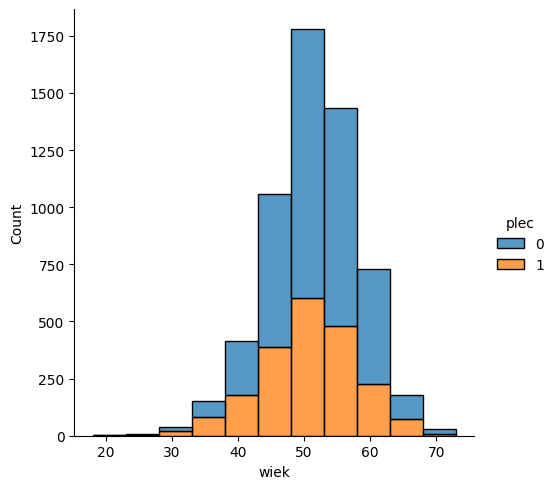

In [12]:
sns.displot(data=clients, x="wiek", hue='plec', multiple="stack", binwidth=5) # ustalamy szerokosc przedzialu na 5 lat

Widzimy, że największą grupą korzystającą z aplikacji są osoby około 50-55 roku życia, w większości grup wiekowych przeważającą płcią jest 0.

Spójrzmy teraz na prosty podział naszych klientów ze względu na ich wykształcenie, okazuje się, że większośc klientów posiada wykształcenie średnie, niewiele mniej osób posiada wykształcenie wyższe, natomiast osoby z wykształceniem podstawowym stanowią najmniej liczną grupę naszych odbiorców - nie jest to jednak dramatyczna różnica.

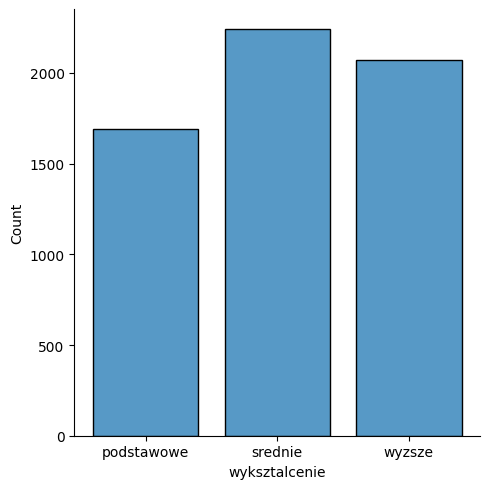

In [13]:
sns.displot(clients, x="wyksztalcenie", shrink=.8)

Poniższy wykres zestawiający wiek użytkowników z ich wykształceniem potwierdza wcześniejsze obserwacje, mianowicie naszą najbardziej liczną grupą klientów są osoby po 50 ze średnim wykształceniem.

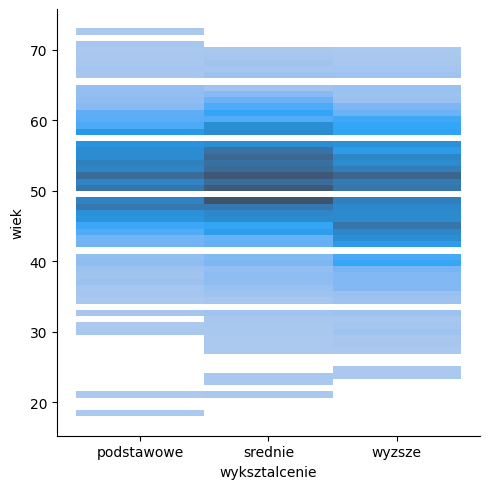

In [14]:
sns.displot(clients, x="wyksztalcenie", y="wiek")

* podział ze względu na dane geograficzne

In [15]:
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

Zaokrąglamy długośc i szerokośc geograficzną do części dzięsiętnej, co odpowiada promieniowi około 11km, i uznamy to za podstawową jednostkę miary dla dalszych obliczeń. Zachowywanie oryginalnej dokładności współrzędnych nie wnosi w naszą analizę wiele wartości a zwiększa rozdzielczość danych, co przy wstępnej, globalnej analizie nie jest dla nas krorzystne.

In [16]:
session_geo[['lon', 'lat']] = session_geo[['lon', 'lat']].round(1)
session_geo.head()

,id_sesji,lon,lat
0,972387,20.4,52.1
1,384994,20.4,52.0
2,173981,20.4,52.0
3,144649,20.4,52.1
4,475443,20.4,52.1


Aby odpowiedzieć na pytanie, jak rozkładają się dane geograficzne naszych użytkowników, zastosujemy interaktywną mapę plotly. Aby móc korzystać z tej funkcji w Jupyter notebooku, nie możemy wyświetlać 120 000 punktów, co nie jest problemem ponieważ nie interesują nas w tym momencie pojedyncze sesje użytkowników, a jedynie najpopularniejsze miejsca logowań (nie musimy wiedzieć kto dokładnie logował się z danych miejsc).

In [21]:
session_geo_unique_locations = session_geo.groupby(['lon', 'lat'],as_index=False).size()

In [27]:
geolocator.reverse(str(52.1)+","+str(20.4), language='pl').raw['address']

{'village': 'Nowy Drzewicz',
 'municipality': 'gmina Wiskitki',
 'county': 'powiat żyrardowski',
 'state': 'województwo mazowieckie',
 'ISO3166-2-lvl4': 'PL-14',
 'country': 'Polska',
 'country_code': 'pl'}

In [124]:
# session_geo_unique_locations['location'] = session_geo_unique_locations.apply(lambda x: geolocator.reverse(str(x.lat)+","+str(x.lon)), axis=1)
# można by było wykorzystać fajną bibliotekę do odczytywania miejsc ze współrzędnych, ale mam za mało czasu na dokońćzenie...

In [73]:
import plotly.express as px
fig = px.scatter_geo(session_geo_unique_locations, lat='lat', lon='lon', size="size")
fig.update_layout(geo_scope='europe') # widząc wcześniej dane, wiemy, że można zawęzić widok jedynie do Europy
fig.show()

Odpowiadając na pytanie o dane geograficzne klientów firmy, możemy stwierdzić, że użytkownicy skupiają się głównie w dużych miastach, widać wyraźnie zwiększoną popularnośc w rajonach miast takich jak Gdańsk, Szczecin, Warszawa, Wrocław czy Poznań, natomiast co ciekawe rejonem największego zainteresowania jest Śląsk.

**Korzystając z interaktywnej mapy, możemy odpowiedzieć od razu na pytanie 5, mianowicie w jakich regionach kraju aplikacja nie jest jeszcze zbyt popularna. Możemy wywnioskować, że aplikacja jest jeszcze mało popularna w mniejszych miejscowościach, przykładowo w rejonach wschodniej granicy kraju.**

* podział klientów ze względu na wykorzystanie aplikacji

/Users/joannawojdylo/opt/anaconda3/envs/inpost/lib/python3.10/site-packages/seaborn/distributions.py:269: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



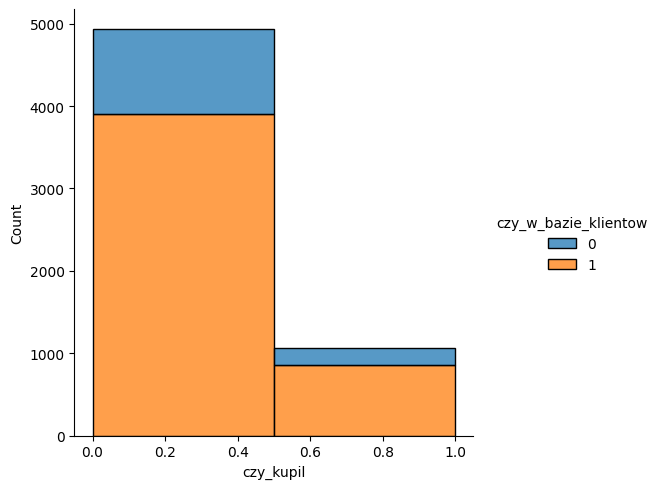

In [32]:
sns.displot(data=clients, x="czy_kupil", hue='czy_w_bazie_klientow', multiple="stack", bins=2)

Jak widzimy znaczna większość klientów nie kupiła wersji premium, a wśród klientów posiadających premium zdecydowana większośc jest zapisana w bazie klientów.

### Czy model płatny trafia zgodnie z założeniami do wykształconej grupy odbiorców?

In [57]:
# % posiadajacych abonament z wyszym wyksztalceniem
premimum_clients_high = clients[(clients['czy_kupil'] == 1) & (clients['wyksztalcenie'] == "wyzsze")].shape[0]
round(premimum_clients_high/clients[clients['czy_kupil'] == 1].shape[0]*100,2)

37.08

In [58]:
# % posiadajacych abonament ze srednim wyksztalceniem
premimum_clients_medium = clients[(clients['czy_kupil'] == 1) & (clients['wyksztalcenie'] == "srednie")].shape[0]
round(premimum_clients_medium/clients[clients['czy_kupil'] == 1].shape[0]*100,2)

37.08

In [49]:
# % posiadajacych abonament z nizszym wyksztalceniem
premimum_clients_primary = clients[(clients['czy_kupil'] == 1) & (clients['wyksztalcenie'] == "podstawowe")].shape[0]
round(premimum_clients_primary/clients[clients['czy_kupil'] == 1].shape[0]*100,2)

25.84

Jak widzimy osoby mające wyższe wykształcenie stanowią dokładnie taki sam procent osób posiadających konto premium jak osoby ze średnim wykształceniem (obie grupy po 37.08%), jedynie osoby z niższym wykształceniem rzadziej sięgają po konto premium, jest to 25.84% użytkowników premium. Odpowiadając więc na pytanie, musimy przyznać, że model zakładający dotarcie do wykształconej grupy odbiorców przynosci dość nikłe rezultaty.

### Czy zarobki użytkowników mają wpływ na częstotliwość korzystania z aplikacji i czas spędzany w apce?

In [60]:
clients['srednia_dlugosc_sesji_min']=session_info.groupby("klient_id")['dlugosc_sesji_min'].mean()

In [61]:
session_info['date'] = pd.to_datetime(session_info['date'], infer_datetime_format=True, errors="coerce")
session_info_clean_date = session_info.dropna(subset=['date'])
session_info_clean_date['month'] = session_info_clean_date['date'].dt.to_period('M')

/var/folders/yc/q5bjbbwn1jd8gffd9tkxxp1r0000gn/T/ipykernel_33660/4242649747.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
clients["srednia_liczba_sesji_na_miesiac"] = session_info_clean_date.groupby(["klient_id", "month"]).count().groupby(["klient_id"])['date'].mean()

In [63]:
clients[['srednia_dlugosc_sesji_min', 'srednia_liczba_sesji_na_miesiac']] = clients[['srednia_dlugosc_sesji_min', 'srednia_liczba_sesji_na_miesiac']].round()

In [65]:
clients.head()

,klient_id,wyksztalcenie,czy_samochod,czy_mieszkanie,plec,wynagrodzenie,wiek,czy_kupil,czy_w_bazie_klientow,liczba_zakupionych_wczesniej_produktow,srednia_dlugosc_sesji_min,srednia_liczba_sesji_na_miesiac
0,0,podstawowe,0,1.0,0,8643.0,61.0,0,0,3.0,6.0,3.0
1,1,srednie,0,0.0,0,5537.0,44.0,0,1,11.0,14.0,4.0
2,2,podstawowe,1,1.0,0,8985.0,50.0,0,1,39.0,9.0,3.0
3,3,srednie,1,0.0,0,5547.0,57.0,0,1,8.0,7.0,3.0
4,4,wyzsze,0,0.0,1,9211.0,54.0,0,1,7.0,9.0,2.0


/var/folders/yc/q5bjbbwn1jd8gffd9tkxxp1r0000gn/T/ipykernel_33660/1817439662.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/var/folders/yc/q5bjbbwn1jd8gffd9tkxxp1r0000gn/T/ipykernel_33660/1817439662.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



klient_id                                -0.000373
czy_samochod                              0.010571
czy_mieszkanie                            0.005907
plec                                     -0.046159
wynagrodzenie                             1.000000
wiek                                     -0.044657
czy_kupil                                -0.147217
czy_w_bazie_klientow                     -0.007944
liczba_zakupionych_wczesniej_produktow   -0.010918
srednia_dlugosc_sesji_min                 0.326957
srednia_liczba_sesji_na_miesiac           0.374958
Name: wynagrodzenie, dtype: float64


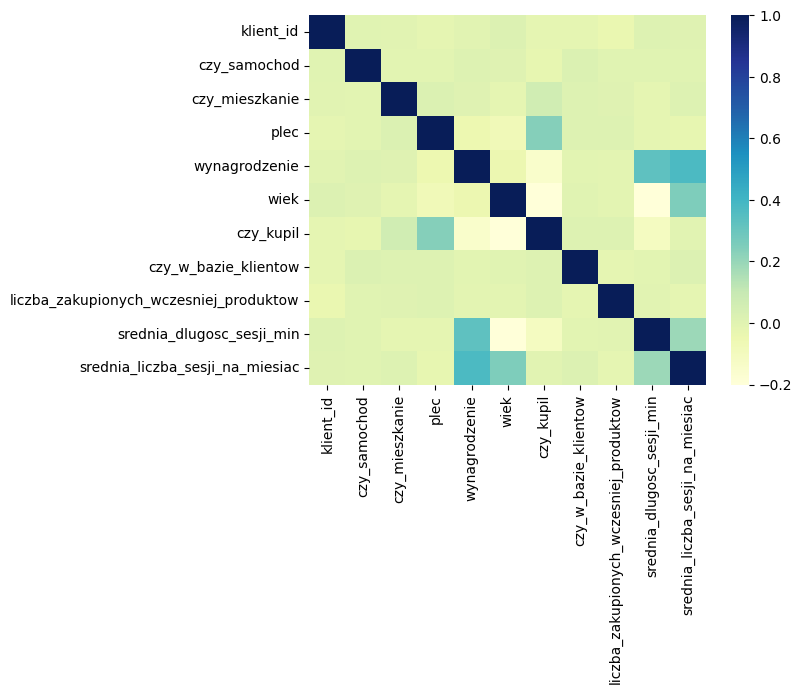

In [72]:
sns.heatmap(clients.corr(), cmap="YlGnBu")

print(clients.corr()["wynagrodzenie"])

Jak widzimy współczynniki korelacji między wynagrodzeniem a średnią długością sesji oraz między wynagrodzeniem a średnią liczbą sesji na miesiąc są większe niż między wynagrodzeniem a innymi zmiennymi, wynosza kolejno 0.33 oraz 0.37. Należy jednak pamiętać, że korelacja nie znaczy kauzacja, i nie jesteśmy na podstawie niniejszych obliczeń odpowiedzieć na pytanie czy zarobki mają wpływ na częstotliwość korzystania z aplikacji i spędzany czas, wiemy jedynie że istnieje pewna relacja między tymi zmiennymi.

### Jak przyrastała nam liczba użytkowników w czasie? Czy było jakieś wydarzenie, które miało wpływ na liczbę użytkowników?

In [80]:
session_info_clean_date['just_date'] = session_info_clean_date['date'].dt.date
session_info_clean_date.head(21)

/var/folders/yc/q5bjbbwn1jd8gffd9tkxxp1r0000gn/T/ipykernel_33660/181163081.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id_sesji,klient_id,date,dlugosc_sesji_min,month,just_date
0,972387,0,2020-05-01 18:07:54,3.302053,2020-05,2020-05-01
1,384994,0,2020-04-14 13:31:19,0.274498,2020-04,2020-04-14
2,173981,0,2020-08-04 17:36:17,2.846373,2020-08,2020-08-04
3,144649,0,2020-04-14 09:54:36,1.009348,2020-04,2020-04-14
4,475443,0,2020-04-24 21:51:14,4.217949,2020-04,2020-04-24
5,309859,0,2020-04-26 09:56:34,4.798495,2020-04,2020-04-26
6,441499,0,2020-04-14 14:43:53,9.465938,2020-04,2020-04-14
7,815406,0,2020-06-11 19:29:20,3.706595,2020-06,2020-06-11
9,215560,0,2020-04-04 18:25:34,7.643954,2020-04,2020-04-04
10,50839,0,2020-06-17 19:13:38,4.362389,2020-06,2020-06-17


In [85]:
clients["pierwsze_uzycie"] = session_info_clean_date.groupby("klient_id")["just_date"].min()
clients_cumsum = clients.copy()
clients_cumsum["cumsum_helper"] = 1
clients_cumsum.head()

,klient_id,wyksztalcenie,czy_samochod,czy_mieszkanie,plec,wynagrodzenie,wiek,czy_kupil,czy_w_bazie_klientow,liczba_zakupionych_wczesniej_produktow,srednia_dlugosc_sesji_min,srednia_liczba_sesji_na_miesiac,pierwsze_uzycie,cumsum_helper
0,0,podstawowe,0,1.0,0,8643.0,61.0,0,0,3.0,6.0,3.0,2020-01-23,1
1,1,srednie,0,0.0,0,5537.0,44.0,0,1,11.0,14.0,4.0,2020-01-06,1
2,2,podstawowe,1,1.0,0,8985.0,50.0,0,1,39.0,9.0,3.0,2020-01-19,1
3,3,srednie,1,0.0,0,5547.0,57.0,0,1,8.0,7.0,3.0,2020-01-08,1
4,4,wyzsze,0,0.0,1,9211.0,54.0,0,1,7.0,9.0,2.0,2020-01-23,1


In [96]:
clients_cumsum = clients_cumsum.sort_values(['pierwsze_uzycie']).reset_index(drop=True)
clients_cumsum

,klient_id,wyksztalcenie,czy_samochod,czy_mieszkanie,plec,wynagrodzenie,wiek,czy_kupil,czy_w_bazie_klientow,liczba_zakupionych_wczesniej_produktow,srednia_dlugosc_sesji_min,srednia_liczba_sesji_na_miesiac,pierwsze_uzycie,cumsum_helper
0,1425,podstawowe,0,1.0,0,9719.0,57.0,1,1,9.0,8.0,3.0,2020-01-01,1
1,2586,srednie,1,0.0,0,9166.0,57.0,0,0,35.0,13.0,3.0,2020-01-01,1
2,905,wyzsze,0,1.0,0,9584.0,56.0,0,0,9.0,14.0,4.0,2020-01-01,1
3,2475,wyzsze,0,0.0,0,9164.0,60.0,0,1,0.0,10.0,4.0,2020-01-01,1
4,5505,srednie,0,0.0,0,10452.0,52.0,0,0,8.0,14.0,3.0,2020-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5637,wyzsze,0,1.0,0,8356.0,52.0,0,0,5.0,12.0,1.0,2020-04-28,1
5996,3456,podstawowe,0,1.0,0,6383.0,49.0,0,0,31.0,17.0,3.0,2020-04-28,1
5997,4456,podstawowe,1,1.0,0,7452.0,NaN,0,0,11.0,19.0,1.0,2020-04-29,1
5998,4649,wyzsze,0,1.0,1,8133.0,44.0,0,1,8.0,14.0,2.0,2020-05-04,1


In [119]:
df = clients_cumsum.groupby('pierwsze_uzycie')[['cumsum_helper']].sum()
df = df["cumsum_helper"].cumsum()

<AxesSubplot: xlabel='pierwsze_uzycie'>

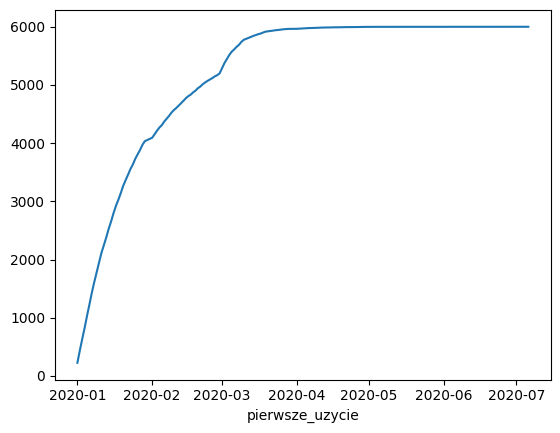

In [122]:
df.plot()

Jak możemy zauważyć, od pierwszego użycia aplikacji przez pierwszego użytkownika, tj. 1. stycznia 2020 do połowy marca 2020 przyrost nowych użytkowników był bardzo dynamiczny, natomiast w okolich połowy marca nastąpiło bardzo gwałtowne spowolnienie przyrostu nowych użytkowników. Sytuacja, która spowodowała tak gwałtowne perturbacje w rozwoju aplikacji to najprawdopodobniej pierwszy lockdown spowodowany epidemią COVID-19. Jak widzimy w danych, aplikacja nie odzyskała swojego początkowego przyrostu użytkowników.